# 서울특별시 코로나19 백신 예방접종 현황
- 데이터 링크 : http://data.seoul.go.kr/dataList/OA-20914/S/1/datasetView.do

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

plt.rc('font', family='NanumBarunGothic')

pd.options.display.float_format = '{:.2f}'.format

In [ ]:
cd /content/drive/MyDrive/일일 데이터 분석/Day2

/content/drive/MyDrive/일일 데이터 분석/Day2


In [ ]:
# 2021. 04. 21 ~ 2022. 12. 07
data = pd.read_csv('./서울시 코로나19 백신 예방접종 현황.csv',encoding='cp949')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   접종일         541 non-null    object 
 1   접종대상자       541 non-null    int64  
 2   당일 1차접종자 수  541 non-null    int64  
 3   1차접종 누계     541 non-null    int64  
 4   1차접종률(%)    541 non-null    float64
 5   당일 2차접종자 수  541 non-null    int64  
 6   2차접종 누계     541 non-null    int64  
 7   2차접종률(%)    541 non-null    float64
 8   당일 3차접종자 수  366 non-null    float64
 9   3차접종 누계     366 non-null    float64
 10  3차접종률(%)    350 non-null    float64
 11  당일 4차접종자 수  212 non-null    float64
 12  4차접종 누계     212 non-null    float64
 13  4차접종률(%)    212 non-null    float64
dtypes: float64(8), int64(5), object(1)
memory usage: 59.3+ KB


In [ ]:
data.isnull().sum()

접종일             0
접종대상자           0
당일 1차접종자 수      0
1차접종 누계         0
1차접종률(%)        0
당일 2차접종자 수      0
2차접종 누계         0
2차접종률(%)        0
당일 3차접종자 수    175
3차접종 누계       175
3차접종률(%)      191
당일 4차접종자 수    329
4차접종 누계       329
4차접종률(%)      329
dtype: int64

In [ ]:
def preprocessing(df):
  df['년'] = df['접종일'].map(lambda x : x[:4])
  df['월'] = df['접종일'].map(lambda x : x[5:7])
  df['요일'] = df['접종일'].map(lambda x : datetime.strptime(x,'%Y.%m.%d').weekday()).astype('object')
  df['접종일'] = pd.to_datetime(df['접종일'])
  return df

train = preprocessing(data)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   접종일         541 non-null    datetime64[ns]
 1   접종대상자       541 non-null    int64         
 2   당일 1차접종자 수  541 non-null    int64         
 3   1차접종 누계     541 non-null    int64         
 4   1차접종률(%)    541 non-null    float64       
 5   당일 2차접종자 수  541 non-null    int64         
 6   2차접종 누계     541 non-null    int64         
 7   2차접종률(%)    541 non-null    float64       
 8   당일 3차접종자 수  366 non-null    float64       
 9   3차접종 누계     366 non-null    float64       
 10  3차접종률(%)    350 non-null    float64       
 11  당일 4차접종자 수  212 non-null    float64       
 12  4차접종 누계     212 non-null    float64       
 13  4차접종률(%)    212 non-null    float64       
 14  년           541 non-null    object        
 15  월           541 non-null    object        
 16  요일          541 non-null  

In [ ]:
train.head()

,접종일,접종대상자,당일 1차접종자 수,1차접종 누계,1차접종률(%),당일 2차접종자 수,2차접종 누계,2차접종률(%),당일 3차접종자 수,3차접종 누계,3차접종률(%),당일 4차접종자 수,4차접종 누계,4차접종률(%),년,월,요일
0,2022-12-07,9401888,44,8334879,88.70,46,8257450,87.80,260.00,6088082.00,64.80,83.00,1273528.00,13.50,2022,12,2
1,2022-12-06,9401888,54,8334900,88.70,30,8257473,87.80,255.00,6087855.00,64.80,81.00,1273481.00,13.50,2022,12,1
2,2022-12-05,9401888,41,8334978,88.70,64,8257575,87.80,426.00,6087708.00,64.70,94.00,1273452.00,13.50,2022,12,0
3,2022-12-04,9401888,120,8334773,88.60,66,8257344,87.80,761.00,6087147.00,64.70,187.00,1273357.00,13.50,2022,12,6
4,2022-12-01,9401888,43,8334830,88.70,45,8257403,87.80,342.00,6086386.00,64.70,134.00,1273170.00,13.50,2022,12,3


In [ ]:
train[['1차접종률(%)','2차접종률(%)','3차접종률(%)','4차접종률(%)']].iloc[0]

1차접종률(%)   88.70
2차접종률(%)   87.80
3차접종률(%)   64.80
4차접종률(%)   13.50
Name: 0, dtype: float64

# 가설
1. ㅇ
 * <br><br>

2. d
 * <br><br>

3. d
 * <br><br>

4. d
 * <br><br>

In [ ]:
def make_plot(df,x_column):
  plt.figure(figsize=(30,15))

  for i in range(11):
    plt.subplot(6,2,i+1)
    sns.lineplot(x = x_column , y=df.columns[2+i], data=df)
    plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=2.0, wspace=0.2, hspace=0.35)
    plt.title(df.columns[2+i],size=20)
    plt.ylabel('')

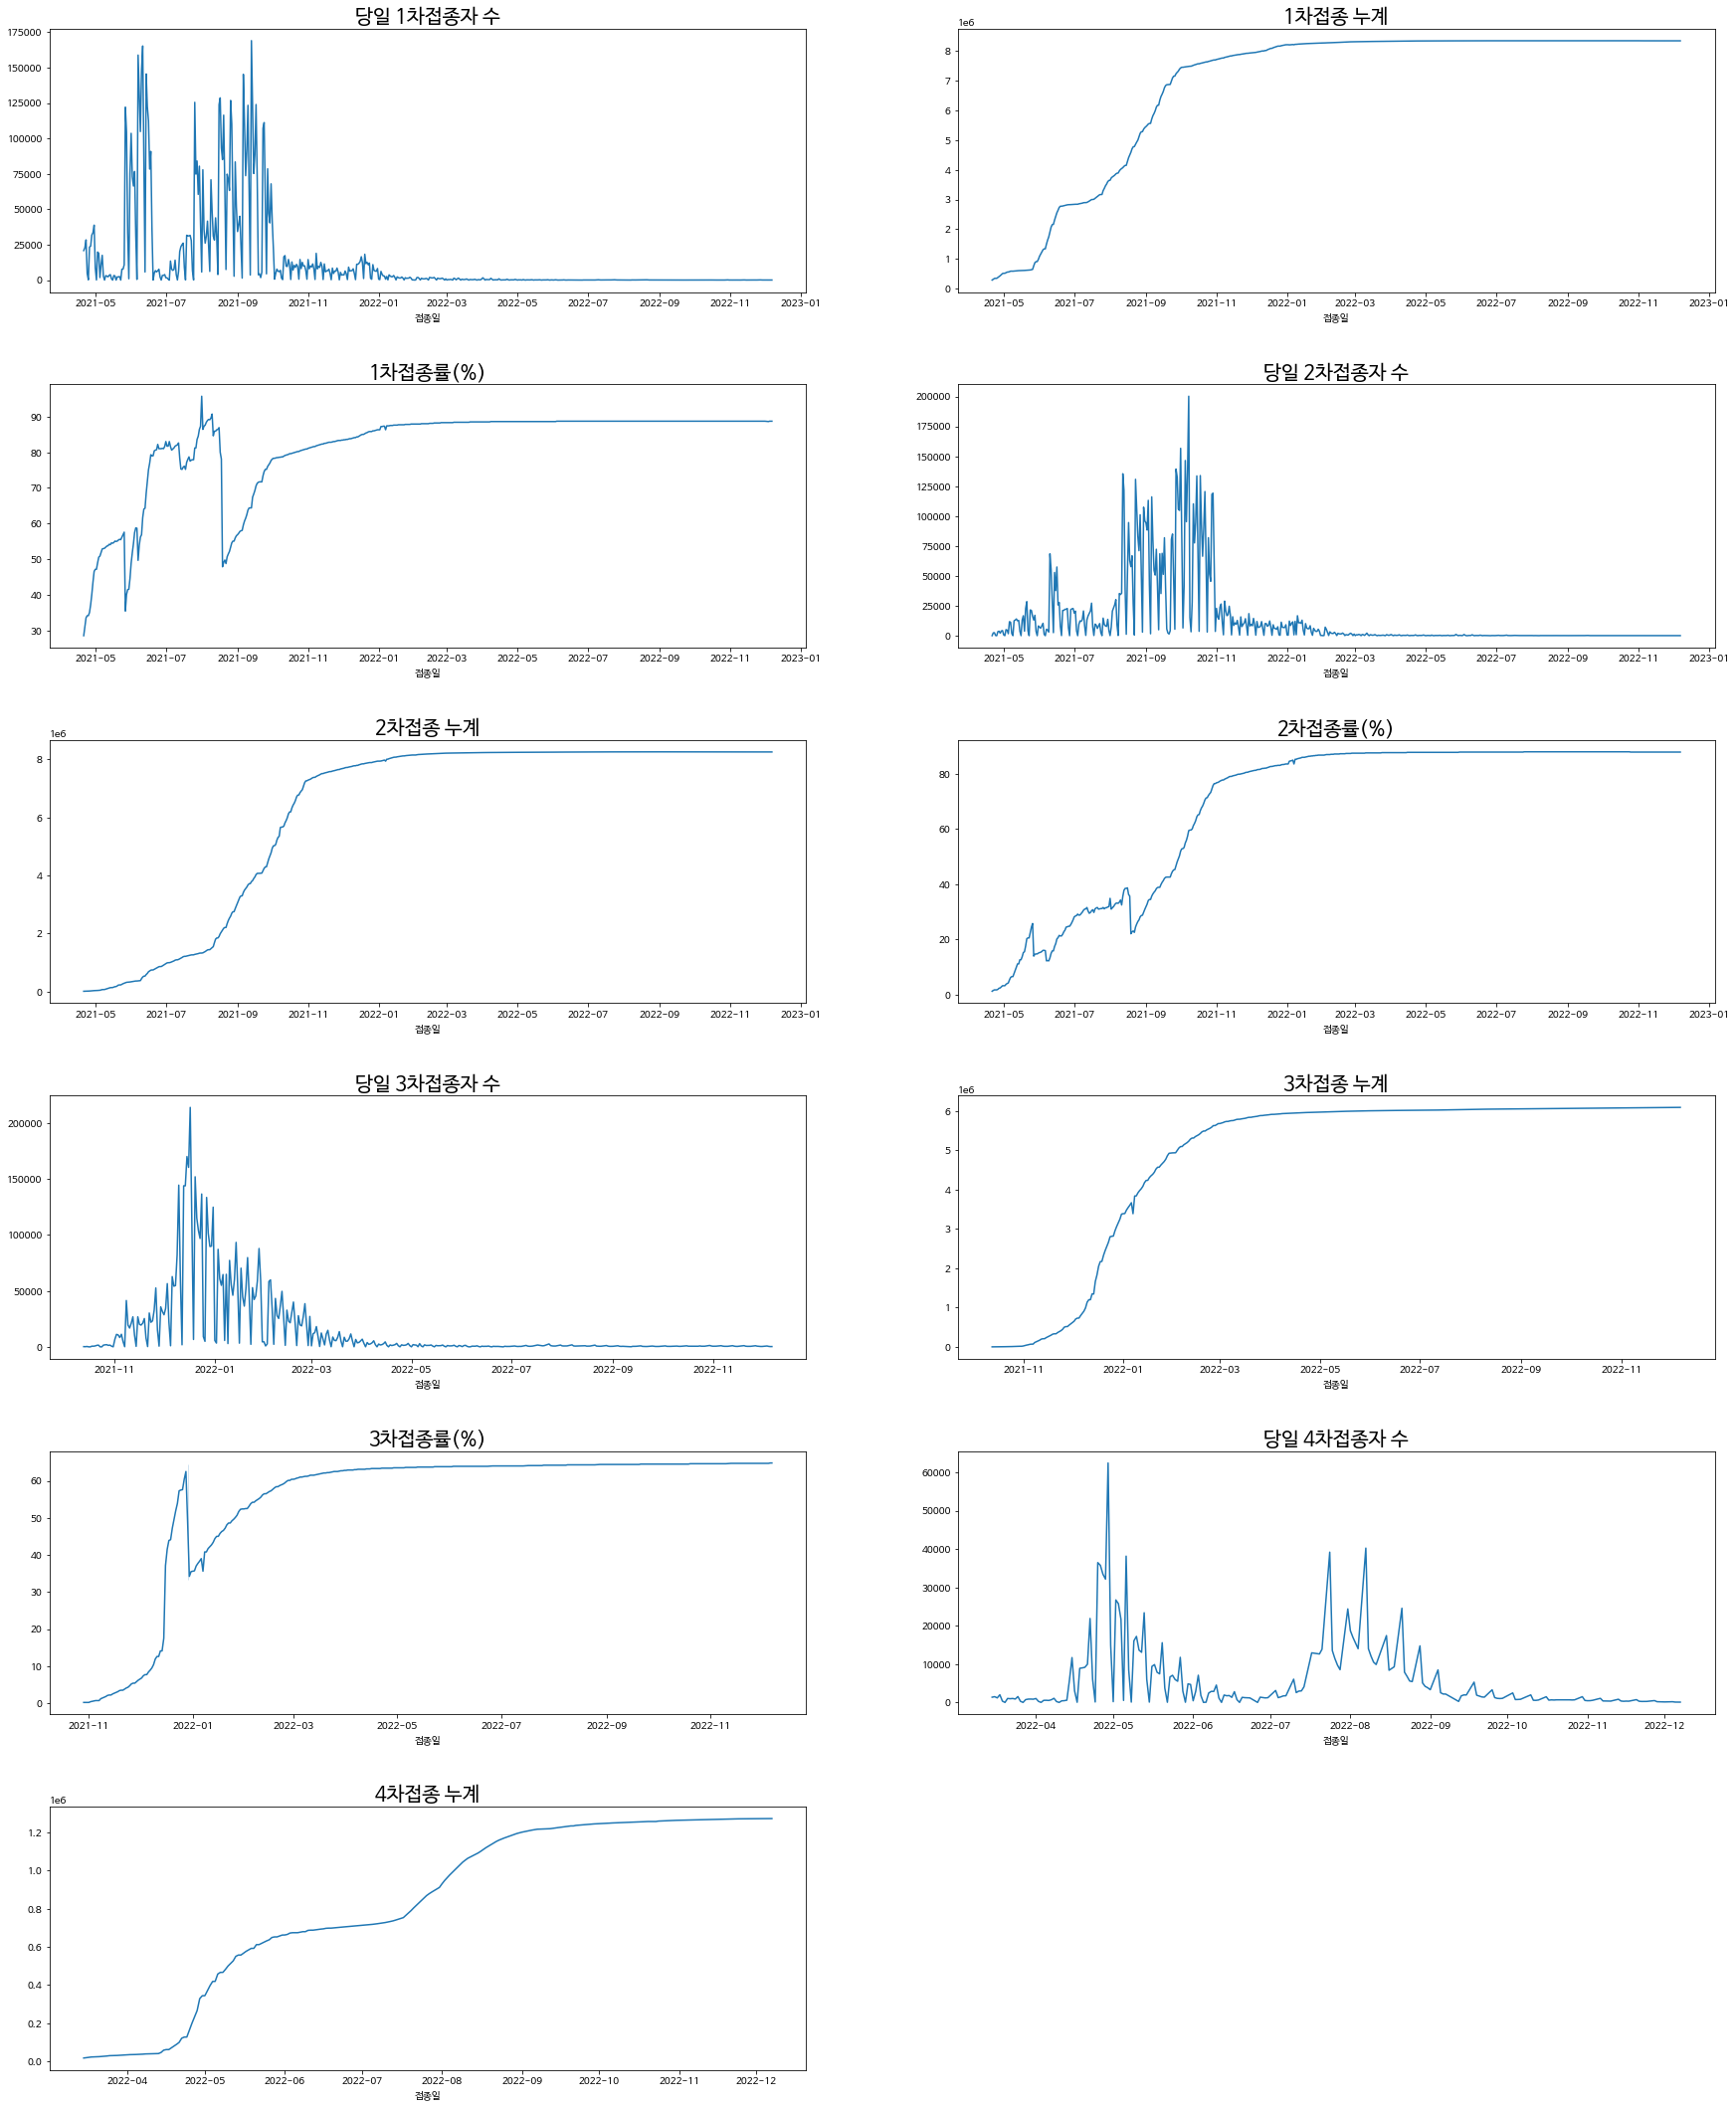

In [ ]:
make_plot(train,'접종일')

In [ ]:
train.columns

Index(['접종일', '접종대상자', '당일 1차접종자 수', '1차접종 누계', '1차접종률(%)', '당일 2차접종자 수',
       '2차접종 누계', '2차접종률(%)', '당일 3차접종자 수', '3차접종 누계', '3차접종률(%)',
       '당일 4차접종자 수', '4차접종 누계', '4차접종률(%)', '년', '월', '요일'],
      dtype='object')

In [ ]:
train['당일 1차접종자 수'].max()

169036

In [ ]:
# 1차 최다 접종일자
train[train['당일 1차접종자 수'] == train['당일 1차접종자 수'].max()]

,접종일,접종대상자,당일 1차접종자 수,1차접종 누계,1차접종률(%),당일 2차접종자 수,2차접종 누계,2차접종률(%),당일 3차접종자 수,3차접종 누계,3차접종률(%),당일 4차접종자 수,4차접종 누계,4차접종률(%),년,월,요일
395,2021-09-13,9575355,169036,6340285,64.40,68468,3790493,38.90,NaN,NaN,NaN,NaN,NaN,NaN,2021,09,0


In [ ]:
# 2차 최다 접종일자
train[train['당일 2차접종자 수'] == train['당일 2차접종자 수'].max()]

,접종일,접종대상자,당일 1차접종자 수,1차접종 누계,1차접종률(%),당일 2차접종자 수,2차접종 누계,2차접종률(%),당일 3차접종자 수,3차접종 누계,3차접종률(%),당일 4차접종자 수,4차접종 누계,4차접종률(%),년,월,요일
370,2021-10-08,9505868,6847,7479069,78.60,200186,5654619,59.40,NaN,NaN,NaN,NaN,NaN,NaN,2021,10,4


In [ ]:
# 3차 최다 접종일자
train[train['당일 3차접종자 수'] == train['당일 3차접종자 수'].max()]

,접종일,접종대상자,당일 1차접종자 수,1차접종 누계,1차접종률(%),당일 2차접종자 수,2차접종 누계,2차접종률(%),당일 3차접종자 수,3차접종 누계,3차접종률(%),당일 4차접종자 수,4차접종 누계,4차접종률(%),년,월,요일
300,2021-12-17,9505868,16484,8068292,84.90,12303,7840748,82.50,213984.00,2048239.00,41.50,NaN,NaN,NaN,2021,12,4


In [ ]:
# 4차 최다 접종일자
train[train['당일 4차접종자 수'] == train['당일 4차접종자 수'].max()]

,접종일,접종대상자,당일 1차접종자 수,1차접종 누계,1차접종률(%),당일 2차접종자 수,2차접종 누계,2차접종률(%),당일 3차접종자 수,3차접종 누계,3차접종률(%),당일 4차접종자 수,4차접종 누계,4차접종률(%),년,월,요일
166,2022-04-29,9401888,480,8331247,88.60,554,8244585,87.70,3081.00,5967685.00,63.50,62443.00,328997.00,3.50,2022,04,4


In [ ]:
# 요일별 접종 수
year = train.groupby('년',as_index=False).sum()
month = train.groupby('월',as_index=False).sum()
day = train.groupby('요일',as_index=False).sum()

weekday_list = ['월', '화', '수', '목', '금', '토', '일']
day['요일'] = day['요일'].apply(lambda x : weekday_list[x])

day

,요일,접종대상자,당일 1차접종자 수,1차접종 누계,1차접종률(%),당일 2차접종자 수,2차접종 누계,2차접종률(%),당일 3차접종자 수,3차접종 누계,3차접종률(%),당일 4차접종자 수,4차접종 누계,4차접종률(%)
0,월,691455076,1631860,582780514,6941.30,1359297,529783547,5851.60,1129103.00,291978317.00,3156.40,211241.00,32349833.00,343.80
1,화,683013044,1298908,575766868,6867.90,1334353,522884123,5780.40,843294.00,286631153.00,3101.70,195538.00,31303454.00,332.70
2,수,685036582,1090246,577017906,6903.80,1144681,523740198,5790.50,913563.00,284720550.00,3083.00,161682.00,30193596.00,321.30
3,목,680621016,1411560,570277917,6790.30,1514704,517266223,5706.40,1012518.00,282546859.00,3047.50,166737.00,29944694.00,318.50
4,금,464773292,1600480,380132942,4780.80,1871714,329269907,3712.20,1342335.00,144423318.00,1582.20,205035.00,4944935.00,52.80
5,토,464789096,766284,380912039,4795.70,772844,330116684,3725.60,608097.00,145428854.00,1595.00,50021.00,5013121.00,53.30
6,일,652622938,55803,547754124,6578.10,53682,495347534,5485.10,61253.00,266554927.00,2883.20,190063.00,26837864.00,285.30


In [ ]:
year

,년,접종대상자,당일 1차접종자 수,1차접종 누계,1차접종률(%),당일 2차접종자 수,2차접종 누계,2차접종률(%),당일 3차접종자 수,3차접종 누계,3차접종률(%),당일 4차접종자 수,4차접종 누계,4차접종률(%)
0,2021,1642461024,7734030,1244401967,18449.30,7767518,904558482,11124.50,3368079.00,68395376.00,1071.40,0.00,0.00,0.00
1,2022,2679850020,121111,2370240343,25208.60,283757,2343849734,24927.30,2542084.00,1633888602.00,17377.60,1180317.00,160587497.00,1707.70


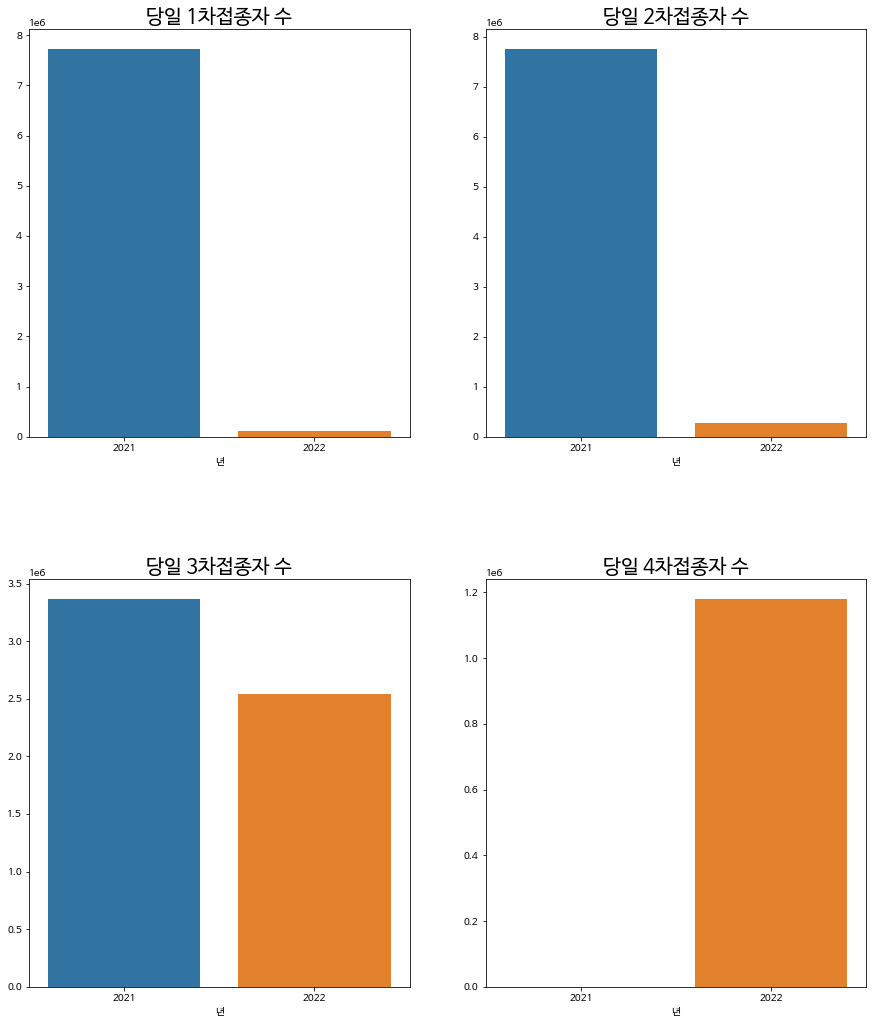

In [ ]:
plt.figure(figsize=(15,7))

col_list = ['당일 1차접종자 수','당일 2차접종자 수','당일 3차접종자 수','당일 4차접종자 수']
for i in range(4):
  plt.subplot(2,2,i+1)
  sns.barplot(x='년',y=year[col_list[i]],data=year)
  plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=2.0, wspace=0.2, hspace=0.35)
  plt.title(col_list[i],size=20)
  plt.ylabel('')

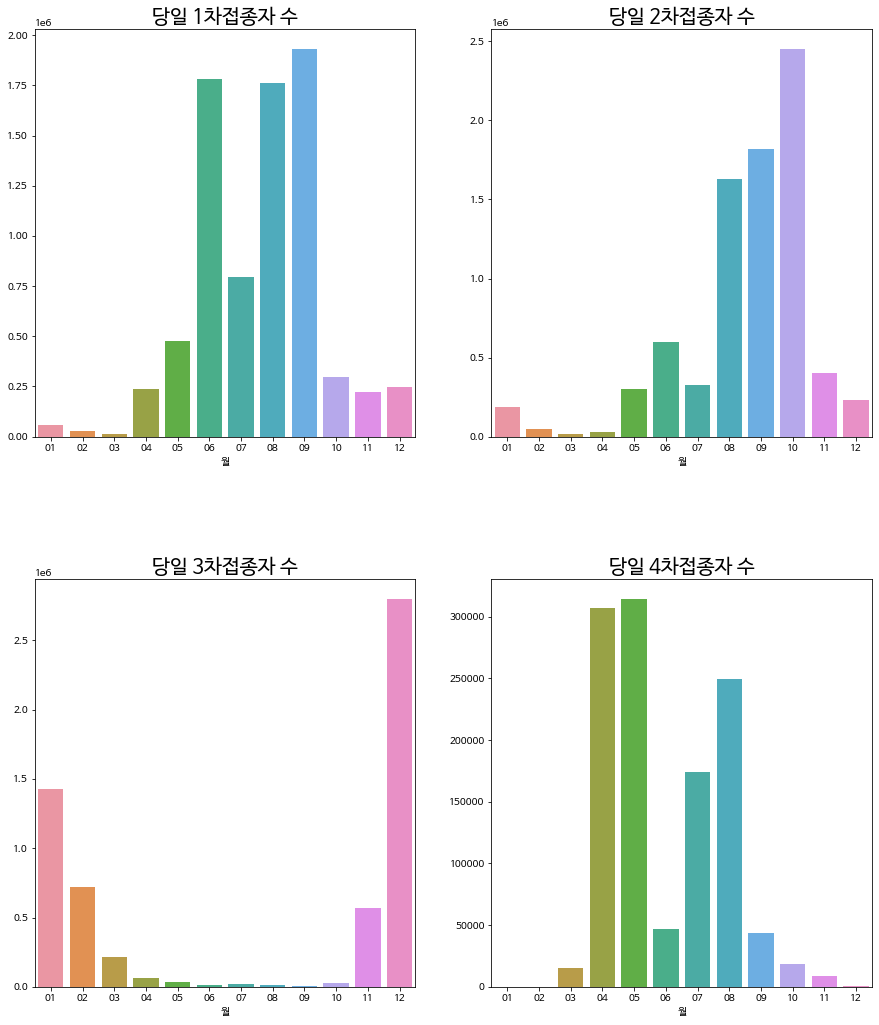

In [ ]:
plt.figure(figsize=(15,7))

col_list = ['당일 1차접종자 수','당일 2차접종자 수','당일 3차접종자 수','당일 4차접종자 수']
for i in range(4):
  plt.subplot(2,2,i+1)
  sns.barplot(x='월',y=month[col_list[i]],data=month)
  plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=2.0, wspace=0.2, hspace=0.35)
  plt.title(col_list[i],size=20)
  plt.ylabel('')

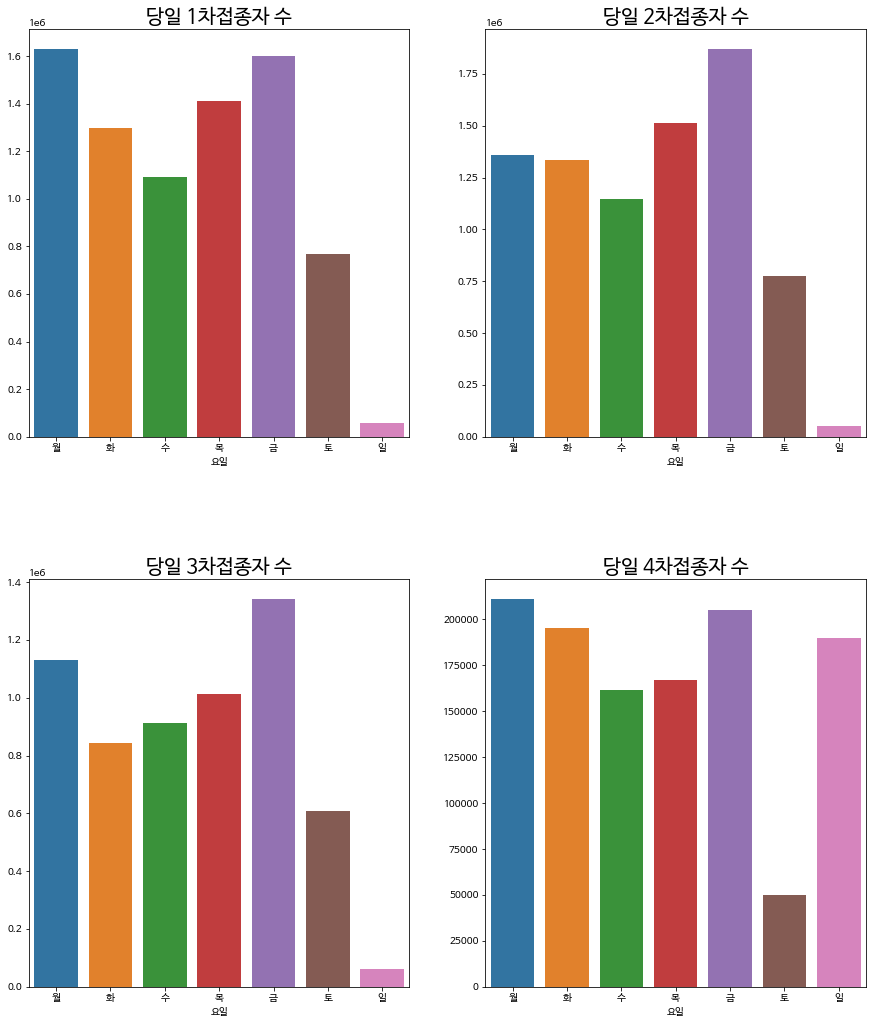

In [ ]:
plt.figure(figsize=(15,7))

col_list = ['당일 1차접종자 수','당일 2차접종자 수','당일 3차접종자 수','당일 4차접종자 수']
for i in range(4):
  plt.subplot(2,2,i+1)
  sns.barplot(x='요일',y=day[col_list[i]],data=day)
  plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=2.0, wspace=0.2, hspace=0.35)
  plt.title(col_list[i],size=20)
  plt.ylabel('')

In [ ]:
tar = train.groupby('접종대상자',as_index=False).sum()

In [ ]:
tar[tar['1차접종률(%)'] == tar['1차접종률(%)'].max()]

,접종대상자,당일 1차접종자 수,1차접종 누계,1차접종률(%),당일 2차접종자 수,2차접종 누계,2차접종률(%),당일 3차접종자 수,3차접종 누계,3차접종률(%),당일 4차접종자 수,4차접종 누계,4차접종률(%)
114,9401888,119506,2345630982,24949.70,282020,2320026374,24676.80,2527333.00,1623728254.00,17270.70,1180317.00,160587497.00,1707.70


In [ ]:
tar[tar['2차접종률(%)'] == tar['2차접종률(%)'].max()]

,접종대상자,당일 1차접종자 수,1차접종 누계,1차접종률(%),당일 2차접종자 수,2차접종 누계,2차접종률(%),당일 3차접종자 수,3차접종 누계,3차접종률(%),당일 4차접종자 수,4차접종 누계,4차접종률(%)
114,9401888,119506,2345630982,24949.70,282020,2320026374,24676.80,2527333.00,1623728254.00,17270.70,1180317.00,160587497.00,1707.70


In [ ]:
tar[tar['3차접종률(%)'] == tar['3차접종률(%)'].max()]

,접종대상자,당일 1차접종자 수,1차접종 누계,1차접종률(%),당일 2차접종자 수,2차접종 누계,2차접종률(%),당일 3차접종자 수,3차접종 누계,3차접종률(%),당일 4차접종자 수,4차접종 누계,4차접종률(%)
114,9401888,119506,2345630982,24949.70,282020,2320026374,24676.80,2527333.00,1623728254.00,17270.70,1180317.00,160587497.00,1707.70


In [ ]:
tar[tar['4차접종률(%)'] == tar['4차접종률(%)'].max()]

,접종대상자,당일 1차접종자 수,1차접종 누계,1차접종률(%),당일 2차접종자 수,2차접종 누계,2차접종률(%),당일 3차접종자 수,3차접종 누계,3차접종률(%),당일 4차접종자 수,4차접종 누계,4차접종률(%)
114,9401888,119506,2345630982,24949.70,282020,2320026374,24676.80,2527333.00,1623728254.00,17270.70,1180317.00,160587497.00,1707.70


In [ ]:
tar.sort_values('당일 1차접종자 수',ascending=False)

,접종대상자,당일 1차접종자 수,1차접종 누계,1차접종률(%),당일 2차접종자 수,2차접종 누계,2차접종률(%),당일 3차접종자 수,3차접종 누계,3차접종률(%),당일 4차접종자 수,4차접종 누계,4차접종률(%)
116,9575355,2319208,196962108,2055.00,2019325,111596866,1164.80,0.00,0.00,0.00,0.00,0.00,0.00
115,9505868,1285858,809321369,8514.10,3785120,725486727,7632.30,3382830.00,78555724.00,1178.30,0.00,0.00,0.00
50,3353331,165265,2070561,61.70,55544,504526,15.00,0.00,0.00,0.00,0.00,0.00,0.00
46,3018205,158842,1500832,49.70,5412,372339,12.30,0.00,0.00,0.00,0.00,0.00,0.00
49,3338670,148732,1900981,56.90,68440,448684,13.40,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27,1121981,14,616705,55.00,3724,175445,15.60,0.00,0.00,0.00,0.00,0.00,0.00
23,1119118,0,610403,54.50,0,141769,12.70,0.00,0.00,0.00,0.00,0.00,0.00
16,1113434,0,591040,53.10,0,73295,6.60,0.00,0.00,0.00,0.00,0.00,0.00
31,1123388,0,623942,55.50,0,231821,20.60,0.00,0.00,0.00,0.00,0.00,0.00


In [ ]:
tar.sort_values('당일 2차접종자 수',ascending=False)

,접종대상자,당일 1차접종자 수,1차접종 누계,1차접종률(%),당일 2차접종자 수,2차접종 누계,2차접종률(%),당일 3차접종자 수,3차접종 누계,3차접종률(%),당일 4차접종자 수,4차접종 누계,4차접종률(%)
115,9505868,1285858,809321369,8514.10,3785120,725486727,7632.30,3382830.00,78555724.00,1178.30,0.00,0.00,0.00
116,9575355,2319208,196962108,2055.00,2019325,111596866,1164.80,0.00,0.00,0.00,0.00,0.00,0.00
114,9401888,119506,2345630982,24949.70,282020,2320026374,24676.80,2527333.00,1623728254.00,17270.70,1180317.00,160587497.00,1707.70
107,4737032,28270,4070622,85.90,135399,1686971,35.60,0.00,0.00,0.00,0.00,0.00,0.00
109,4788775,43931,4115097,85.90,121688,1808837,37.80,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37,2195709,950,912517,41.60,0,325079,14.80,0.00,0.00,0.00,0.00,0.00,0.00
31,1123388,0,623942,55.50,0,231821,20.60,0.00,0.00,0.00,0.00,0.00,0.00
23,1119118,0,610403,54.50,0,141769,12.70,0.00,0.00,0.00,0.00,0.00,0.00
16,1113434,0,591040,53.10,0,73295,6.60,0.00,0.00,0.00,0.00,0.00,0.00


In [ ]:
tar.sort_values('당일 3차접종자 수',ascending=False)

,접종대상자,당일 1차접종자 수,1차접종 누계,1차접종률(%),당일 2차접종자 수,2차접종 누계,2차접종률(%),당일 3차접종자 수,3차접종 누계,3차접종률(%),당일 4차접종자 수,4차접종 누계,4차접종률(%)
115,9505868,1285858,809321369,8514.10,3785120,725486727,7632.30,3382830.00,78555724.00,1178.30,0.00,0.00,0.00
114,9401888,119506,2345630982,24949.70,282020,2320026374,24676.80,2527333.00,1623728254.00,17270.70,1180317.00,160587497.00,1707.70
0,1019322,20830,291857,28.60,25,13543,1.30,0.00,0.00,0.00,0.00,0.00,0.00
73,3514797,6195,2902429,82.60,13308,1110216,31.60,0.00,0.00,0.00,0.00,0.00,0.00
85,3943320,31192,3102494,78.70,6008,1245273,31.60,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35,2175217,122034,772541,35.50,13061,304336,14.00,0.00,0.00,0.00,0.00,0.00,0.00
34,1129593,10780,650432,57.60,16175,291118,25.80,0.00,0.00,0.00,0.00,0.00,0.00
33,1124159,7688,631695,56.20,21524,253528,22.60,0.00,0.00,0.00,0.00,0.00,0.00
32,1123393,7748,639483,56.90,21010,274749,24.50,0.00,0.00,0.00,0.00,0.00,0.00


In [ ]:
tar.sort_values('당일 4차접종자 수',ascending=False)

,접종대상자,당일 1차접종자 수,1차접종 누계,1차접종률(%),당일 2차접종자 수,2차접종 누계,2차접종률(%),당일 3차접종자 수,3차접종 누계,3차접종률(%),당일 4차접종자 수,4차접종 누계,4차접종률(%)
114,9401888,119506,2345630982,24949.70,282020,2320026374,24676.80,2527333.00,1623728254.00,17270.70,1180317.00,160587497.00,1707.70
0,1019322,20830,291857,28.60,25,13543,1.30,0.00,0.00,0.00,0.00,0.00,0.00
74,3528530,66,2896204,82.10,222,1096845,31.10,0.00,0.00,0.00,0.00,0.00,0.00
86,3950821,51112,5970648,151.00,47842,2379788,60.20,0.00,0.00,0.00,0.00,0.00,0.00
85,3943320,31192,3102494,78.70,6008,1245273,31.60,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35,2175217,122034,772541,35.50,13061,304336,14.00,0.00,0.00,0.00,0.00,0.00,0.00
34,1129593,10780,650432,57.60,16175,291118,25.80,0.00,0.00,0.00,0.00,0.00,0.00
33,1124159,7688,631695,56.20,21524,253528,22.60,0.00,0.00,0.00,0.00,0.00,0.00
32,1123393,7748,639483,56.90,21010,274749,24.50,0.00,0.00,0.00,0.00,0.00,0.00
